In [0]:
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt

Q_1
Let $A$ be a variable to denote the event of positive result in the test and $B$ be the variable to denote event of actially having Boogie fever.

Bayes' rule provides 

\begin{align}
P(B|A) = \frac{P(A|B)P(B)}{P(A)}
\end{align}

Here,  we get

\begin{align}
P(B) = 0.004\\
P(A|B) = 0.8\\
P(A)=P(A,B) + P(A,\bar B) = P(A|B)P(B) + P(A|\bar B)P(\bar B) = 0.1028\\
\end{align}

Therefore, we get

\begin{align}
P(B|A) = \frac {0.0032}{0.1028}  \approx 0.03
\end{align}



Q_2
\begin{align}
Cov[X,Y] \\= E[(X-E[X])(Y-E[Y])^T]\\
=E[(X-\mu)(AX+b-E[AX+b])^T]\\
=E[(X-\mu)(AX - A \mu)^T]\\
=E[(X - \mu)(X-\mu)^T] A^{T}\\
=\Sigma A^T
\end{align}

Q_3

Since 
\begin{align}
\Sigma= \begin{bmatrix} .3 &-1\\ -1 &5 \end{bmatrix} 
\end{align}

We get $\sigma_x = \sqrt {.3}$.
This, along with $\mu = \begin{bmatrix} 0 \\0\end{bmatrix}$ gives 
\begin{align}
p(x) = \frac{exp(-\frac{x^2}{.6})}{\sqrt{.6\pi}}
\end{align}

On the other hand,
\begin{align}
E(x|y = -1) = E(x) + .6 = .6\\
and\\
\sigma(x|y=-1) = \sqrt{.1}
\end{align}

Therefore, 
\begin{align}
p(x|y=-1) = \frac{exp(-5(x-.6)^2)}{\sqrt{.2\pi}}
\end{align}

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: covariance is not positive-semidefinite.
  """Entry point for launching an IPython kernel.


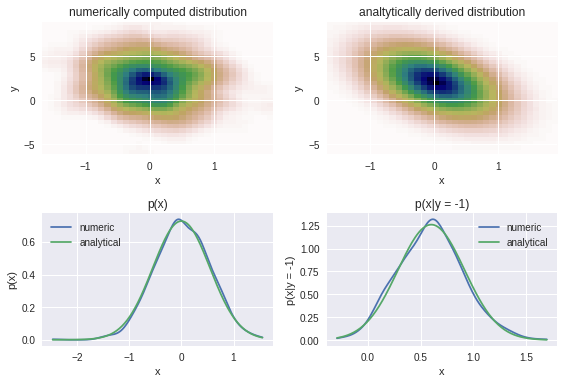

In [9]:
# generate samples
xy = np.random.multivariate_normal([0,2],[[.3,-1],[-.1,5]],1000).T
x_2 = np.random.multivariate_normal([0],[[.3]],1000).T
x_3 = np.random.multivariate_normal([.6],[[.1]],1000).T

#apply kernel estimators
kernel_xy = stats.gaussian_kde(xy)
kernel_x_2 = stats.gaussian_kde(x_2)
kernel_x_3 = stats.gaussian_kde(x_3)

#2d examples
x_grid, y_grid = np.mgrid[np.min(xy[0,:]):np.max(xy[0,:]):.1, np.min(xy[1,:]):np.max(xy[1,:]):.5]
#x_grid, y_grid = np.mgrid[xy[0,:],xy[1,:]]
positions = np.vstack([x_grid.ravel(), y_grid.ravel()])
z_numeric  = np.reshape(kernel_xy(positions).T, x_grid.shape)
mu = np.asarray([[0],[2]])
cov = np.asarray([[.3,-1],[-.1,5]])

z_analytic = np.reshape(np.exp(-np.diag(np.dot(np.dot((positions-mu).T,np.linalg.inv(cov)),positions-mu))/2)/np.sqrt((2 * np.pi) ** 2 *np.linalg.det(cov)),x_grid.shape)

#plot them 
sub_1 = plt.subplot(221)
sub_1.imshow(np.rot90(z_numeric), cmap=plt.cm.gist_earth_r, extent=[np.min(xy[0,:]),np.max(xy[0,:]),np.min(xy[1,:]),np.max(xy[1,:])])
sub_1.set_aspect('auto')
sub_1.set_title('numerically computed distribution')
sub_1.set_xlabel('x')
sub_1.set_ylabel('y')


sub_2 = plt.subplot(222)
sub_2.imshow(np.rot90(z_analytic), cmap=plt.cm.gist_earth_r, extent=[np.min(xy[0,:]),np.max(xy[0,:]),np.min(xy[1,:]),np.max(xy[1,:])])
sub_2.set_aspect('auto')
sub_2.set_title('analtytically derived distribution')
sub_2.set_xlabel('x')
sub_2.set_ylabel('y')

samples = [x_2,x_3]
kernels = [kernel_x_2,kernel_x_3]
means = [0,.6]
variances = [.3,.1]
for i in range(2):
  sub_3 = plt.subplot(2,2,3 + i)
  sample = samples[i]
  kernel = kernels[i]
  mean = means[i]
  var = variances[i]
  x_grid_1d = np.mgrid[np.min(sample[0,:]):np.max(sample[0,:]):.01]
  y_numeric = kernel(x_grid_1d)
  y_analytic = np.exp(-((x_grid_1d - mean) ** 2)/(2 * var)) /(np.sqrt(2 * var * np.pi))
  numeric = sub_3.plot(x_grid_1d,y_numeric,label='numeric')
  analytical = sub_3.plot(x_grid_1d,y_analytic,label='analytical')
  sub_3.set_xlabel('x')
  
  if i == 0:
    plt.title('p(x)')
    sub_3.set_ylabel('p(x)')
  else:
    plt.title('p(x|y = -1)')
    sub_3.set_ylabel('p(x|y = -1)')
  sub_3.legend()
plt.tight_layout()

Q_4

Empirical mean of Y is [0.00278022 1.159388  ]


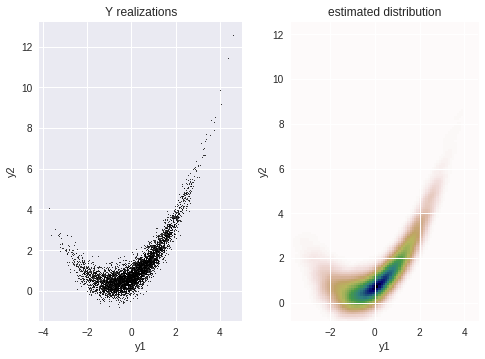

In [10]:
#Q 4
X = np.random.multivariate_normal([0,0],[[1,.9],[.9,1]],5000).T
Y = np.vstack((1.15 * X[0,:] , X[1,:]/ 1.15 + .5 * (X[0,:] ** 2 + 1.15 ** 2)))
kernel_y = stats.gaussian_kde(Y)
#plot Y
q4_sub1 = plt.subplot(121)
q4_sub1.plot(Y[0,:],Y[1,:],'k.', markersize=2)
plt.title('Y realizations')
q4_sub1.set_xlabel('y1')
q4_sub1.set_ylabel('y2')
q4_sub2 = plt.subplot(122)
x_grid_q4,y_grid_q4 = np.mgrid[np.min(Y[0,:]):np.max(Y[0,:]):.1,np.min(Y[1,:]):np.max(Y[1,:]):.1]
positions_q4 = np.vstack([x_grid_q4.ravel(), y_grid_q4.ravel()])
z_numeric_q4  = np.reshape(kernel_y(positions_q4).T, x_grid_q4.shape)
q4_sub2.imshow(np.rot90(z_numeric_q4), cmap=plt.cm.gist_earth_r, extent=[np.min(Y[0,:]),np.max(Y[0,:]),np.min(Y[1,:]),np.max(Y[1,:])])
plt.title('estimated distribution')
q4_sub2.set_xlabel('y1')
q4_sub2.set_ylabel('y2')
print('Empirical mean of Y is ' + str(np.mean(Y,axis = 1)))